# Importing Libaries

* Primarily we will be using the TensorFlow library for this entire task.
* `import os` will provide us with the capacity to interact with the Operating System.

In [1]:
import tensorflow as tf
import os

## About the dataset

This dataset comprises movie critiques shared by IMDb website users, alongside associated labels denoting whether the reviewers expressed a positive or negative sentiment towards the films.

This dataset is intended for binary sentiment classification and consists of 25,000 extremely polarized movie reviews for both training and testing. These sets are balanced, ensuring an equal distribution of positive and negative reviews.

In [2]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# Downloading Dataset

* `tf.keras.utils.get_file()` is a utility function provided by TensorFlow's Keras API.
* This function is used to download a file from the internet and cache it locally, making it accessible for future use.
* It's commonly used in machine learning projects for downloading datasets or pre-trained models.
* It also has decompression capacity which we would need.

In [3]:
dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')


84125825/84125825 [==============================] - 8s 0us/step


**Path setting is important as data is structured data in form of folders.**

* `os.path.join()` is a function in the Python os module that is used to join one or more path components (folder names and file names) intelligently.

* It takes care of constructing a valid path regardless of the operating system

In [4]:
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

['test', 'train', 'imdb.vocab', 'README', 'imdbEr.txt']

---

# Creating the Training directory

In [5]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'pos',
 'unsup',
 'urls_unsup.txt',
 'unsupBow.feat',
 'urls_pos.txt',
 'neg',
 'urls_neg.txt']

## Viewing a positive review

To view a positive review, we will need to go at the folder granularity at first and then at a sample level.

In [6]:
positive_reviews_folder = os.path.join(train_dir, 'pos')
!ls {positive_reviews_folder}

0_9.txt       11876_10.txt  2501_8.txt	 4377_10.txt  625_10.txt   8127_8.txt
10000_8.txt   11877_10.txt  2502_8.txt	 4378_9.txt   6251_7.txt   8128_10.txt
10001_10.txt  11878_10.txt  2503_10.txt  4379_8.txt   6252_10.txt  8129_9.txt
10002_7.txt   11879_10.txt  2504_10.txt  437_9.txt    6253_8.txt   8130_10.txt
10003_8.txt   11880_10.txt  2505_9.txt	 4380_8.txt   6254_10.txt  813_10.txt
10004_8.txt   11881_9.txt   2506_9.txt	 4381_10.txt  6255_8.txt   8131_8.txt
10005_7.txt   11882_8.txt   2507_7.txt	 4382_8.txt   6256_8.txt   8132_10.txt
10006_7.txt   11883_8.txt   250_7.txt	 4383_9.txt   6257_10.txt  8133_7.txt
10007_7.txt   11884_8.txt   2508_10.txt  4384_10.txt  6258_8.txt   8134_10.txt
10008_7.txt   11885_7.txt   2509_9.txt	 4385_9.txt   6259_8.txt   8135_10.txt
1000_8.txt    11886_10.txt  2510_10.txt  4386_9.txt   6260_10.txt  8136_9.txt
10009_9.txt   11887_8.txt   251_10.txt	 4387_9.txt   6261_8.txt   8137_10.txt
10010_7.txt   11888_9.txt   2511_10.txt  4388_9.txt   6262_9.txt   

### Sample Positive

In [7]:
sample_positive_reviews_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_positive_reviews_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


## Viewing a negative review

In [8]:
negative_reviews_folder = os.path.join(train_dir, 'neg')
!ls {negative_reviews_folder}

0_3.txt      11874_1.txt  2500_1.txt  4376_1.txt  6251_1.txt  8127_2.txt
10000_4.txt  11875_4.txt  2501_1.txt  4377_3.txt  6252_1.txt  8128_1.txt
10001_4.txt  11876_1.txt  2502_1.txt  4378_4.txt  6253_2.txt  8129_3.txt
10002_1.txt  11877_1.txt  2503_1.txt  4379_1.txt  6254_3.txt  8130_3.txt
10003_1.txt  11878_1.txt  250_3.txt   4380_1.txt  625_4.txt   8131_1.txt
10004_3.txt  11879_1.txt  2504_3.txt  4381_2.txt  6255_1.txt  8132_3.txt
1000_4.txt   11880_1.txt  2505_2.txt  4382_3.txt  6256_3.txt  8133_1.txt
10005_3.txt  11881_1.txt  2506_3.txt  4383_1.txt  6257_1.txt  813_3.txt
10006_4.txt  11882_1.txt  2507_2.txt  4384_1.txt  6258_4.txt  8134_3.txt
10007_1.txt  11883_1.txt  2508_4.txt  438_4.txt   6259_3.txt  8135_2.txt
10008_2.txt  11884_4.txt  2509_4.txt  4385_3.txt  6260_1.txt  8136_1.txt
10009_1.txt  1188_4.txt   2510_4.txt  4386_3.txt  6261_2.txt  8137_4.txt
10010_3.txt  11885_1.txt  2511_4.txt  4387_3.txt  6262_1.txt  8138_2.txt
10011_3.txt  11886_1.txt  2512_4.txt  4388_2.txt  62

### Sample Negative

In [9]:
sample_negative_reviews_file = os.path.join(train_dir, 'neg/10001_4.txt')
with open(sample_negative_reviews_file) as f:
    print(f.read())

This film lacked something I couldn't put my finger on at first: charisma on the part of the leading actress. This inevitably translated to lack of chemistry when she shared the screen with her leading man. Even the romantic scenes came across as being merely the actors at play. It could very well have been the director who miscalculated what he needed from the actors. I just don't know.<br /><br />But could it have been the screenplay? Just exactly who was the chef in love with? He seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful exploits, than of anybody or anything else. He never convinced me he was in love with the princess.<br /><br />I was disappointed in this movie. But, don't forget it was nominated for an Oscar, so judge for yourself.


## Keeping only required folders

* We remove `unsup` directory as of now it is not required.

In [10]:
import shutil
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [11]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'pos',
 'urls_unsup.txt',
 'unsupBow.feat',
 'urls_pos.txt',
 'neg',
 'urls_neg.txt']

---

# Loading data from directory

We will use the following utility to load the dataset from the directory -
* `tf.keras.preprocessing.text_dataset_from_directory` is a function provided by TensorFlow's Keras API for creating a text dataset from a directory of text files.
* This function is useful for tasks involving text classification, sentiment analysis, or any machine learning task where you have text data organized in folders or directories, each containing text files corresponding to different classes or categories.

* **Naming Strategy -**
* Initially we will load the 3 sets - training, validation and test as `raw` sets, we will remove this prefix only after we have preprocessed them and they are ready for modeling.

## Loading the training dataset

* We do not have separate data provided for validation, so we will split our training data into 20% for validation.
* Be careful while assigning the parameter called `subset`.

In [12]:
batch_size = 32
seed = 42
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)
raw_train_ds

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### View the train dataset

Using simple for loops, we will iterate and print 10 reviews and their coressponding labels.

In [13]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(10):
        print(f"Review: {text_batch.numpy()[i]}")
        print(f"Label: {label_batch.numpy()[i]}")
        print()

Review: b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label: 0

Review: b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get i

### Viewing class names

Checking how the values of label are mapped to sentiments.

In [14]:
print("Label 0 maps to class : ", raw_train_ds.class_names[0])
print("Label 1 maps to class : ", raw_train_ds.class_names[1])

Label 0 maps to class :  neg
Label 1 maps to class :  pos


## Loading the validation dataset

* Parameter `subset` will be validation.

In [15]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


## Loading the test dataset

In [16]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


# Text Preprocessing

We define a custom preprocessing function called `cleanse` which does the following -
1. Lowercasing
2. Removal of HTML tags
3. Remove punctuation

We make use of  TensorFlow's string manipulation functions and RegEx.

In [17]:
import re
import string
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')

    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

## Standardization, Tokenization and Vectorization

We will create a TextVectorization layer with parameters like -
* `max_tokens` (the maximum vocabulary size)
* `output_mode` (how to output the data, "int" for integers)
* `output_sequence_length` (the length of the output sequences).

We adapt the layer to the training data using the adapt method. This builds the vocabulary and sets up the layer for vectorization.

We can then use the vectorizer to convert new text data into integer sequences.

The result will be a sequence of integers for each input text. These integer sequences can be used as input to the neural network.

**TextVectorization is a flexible tool, and you can customize its behavior by adjusting parameters like tokenization methods, vocabulary size, and sequence length to fit your specific NLP task.**

In [18]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

Now we will create a `TextVectorization` layer. We will use this layer to standardize, tokenize, and vectorize our data.
* We set the `output_mode` to int to create unique integer indices for each token.

In [19]:
max_features = 10000
sequence_length = 250
vectorization_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

Next, we will call adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.

In [20]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorization_layer.adapt(train_text)

## Custom Text Vectorization Function

This function takes in a text input and its corresponding label and performs text vectorization on the input text using a pre-configured `vectorization_layer`.

**Line by line explanation** -

* `text = tf.expand_dims(text, -1)`: This line expands the dimensions of the input text tensor by adding a new axis at the end. This is typically done to ensure that the text tensor has the shape (batch_size, 1), which is often expected by text vectorization layers.

* `return vectorization_layer(text), label`: The function then applies our custom function to the expanded text tensor. This layer converts the text into integer sequences. After vectorization, the function returns a tuple containing the vectorized text and the original label.


In [21]:
def vectorizer(text, label):
    text = tf.expand_dims(text, -1)
    return vectorization_layer(text), label

### Reviewing a batch of 32 reviews and labels from the dataset

In [22]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review : ", first_review)
print("Label : ", raw_train_ds.class_names[first_label])
print("Vectorized review : ", vectorizer(first_review, first_label))

Review :  tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label :  neg
Vectorized review :  (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0

Each token has been replaced by an integer. We can see the token (string) that each integer corresponds to by calling `.get_vocabulary()` on the layer.

In [23]:
print(" 200 ---> ",vectorization_layer.get_vocabulary()[1287])
print(" 331 ---> ",vectorization_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorization_layer.get_vocabulary())))

 200 --->  silent
 331 --->  night
Vocabulary size: 10000


## Applying `TextVectorization` function to train, validation and test dataset

In [24]:
train_ds = raw_train_ds.map(vectorizer)
val_ds = raw_val_ds.map(vectorizer)
test_ds = raw_test_ds.map(vectorizer)

# Configuring the dataset for performance

When loading data to make sure that I/O does not become blocking.

`.cache()` keeps data in memory after it’s loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

`.prefetch()` overlaps data preprocessing and model execution while training.

More here - https://www.tensorflow.org/guide/data_performance

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Creation

**Model Explanation Line-by-line**

1. **Embedding Layer**: `layers.Embedding(max_features + 1, embedding_dim)` $\rightarrow$ This is an embedding layer. It is used to convert integer-encoded words (or tokens) into dense vectors of fixed size (embedding_dim).
max_features + 1 is the input dimension of the embedding layer. It typically represents the size of the vocabulary plus one for out-of-vocabulary (OOV) tokens.
embedding_dim is the dimension of the dense embedding vectors. Each word in the input sequence is mapped to a dense vector of this dimension.

2. **Dropout Layer**: `layers.Dropout(0.2)` $\rightarrow$ This dropout layer is used to prevent overfitting. It randomly sets a fraction of the input units to 0 during training to reduce the model's reliance on any particular feature. In this case, 20% of the input units are set to 0 during training.

3. **Global Average Pooling Layer**: `layers.GlobalAveragePooling1D()` $\rightarrow$ This layer computes the average of all the embeddings along the time dimension. It's often used for variable-length input sequences and reduces the dimensionality of the data while retaining important information.
Another Dropout Layer:

4. `layers.Dropout(0.2)`: Another dropout layer is added after global average pooling to further regularize the model.

5. **Dense Layer**: `layers.Dense(1)`: This is the output layer of the model. It consists of a single neuron (units=1) with a linear activation function. This indicates that the model is being used for binary classification, where it predicts a single output value (e.g., 0 or 1)

In [26]:
from tensorflow.keras import layers
embedding_dim = 16
model_dense = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])
model_dense

In [27]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

# Model Compilation

**Line-by-line explanation -**

1. **Loss Function**: `losses.BinaryCrossentropy(from_logits=True)` $\rightarrow$ This sets the loss function for your model. BinaryCrossentropy is a common choice for binary classification problems, such as sentiment analysis or binary document classification. `from_logits=True` indicates that the model's output is considered logits, meaning the output is not passed through a sigmoid activation function before calculating the loss. This is typically used when the model's output represents unbounded log-odds and no activation function has been applied.

2. **Optimizer**: `adam` $\rightarrow$ This specifies the optimizer to be used during training. 'adam' refers to the Adam optimizer, which is a popular choice for gradient-based optimization in deep learning. Adam adapts the learning rate during training to speed up convergence.

3. **Metrics**: `tf.metrics.BinaryAccuracy(threshold=0.0)` $\rightarrow$ This sets the evaluation metric for your model. BinaryAccuracy is a metric used for binary classification problems. The threshold parameter defines the decision threshold for classifying binary outputs. A threshold of 0.0 means that any value greater than or equal to 0.0 is considered as class 1, and any value less than 0.0 is considered as class 0.



In [28]:
from tensorflow.keras import losses
model_dense.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

# Model Training

**Line-by-line explanation -**

**epochs** = 10: You're setting the number of training epochs to 10. An epoch is one complete pass through your entire training dataset during training. In this case, the model will see and learn from the training dataset 10 times.

**`history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)`** $\rightarrow$ This line of code initiates the training process of your model. The history variable stores information about the training process, including training and validation loss and any specified metrics. You can use this history object to visualize how your model's performance improves or changes over the training epochs.



In [29]:
epochs = 10
history_dense = model_dense.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 62s 90ms/step - loss: 0.6634 - binary_accuracy: 0.6974 - val_loss: 0.6144 - val_binary_accuracy: 0.7728
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5483 - binary_accuracy: 0.8008 - val_loss: 0.4977 - val_binary_accuracy: 0.8250
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4443 - binary_accuracy: 0.8455 - val_loss: 0.4195 - val_binary_accuracy: 0.8486
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3776 - binary_accuracy: 0.8659 - val_loss: 0.3734 - val_binary_accuracy: 0.8618
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3350 - binary_accuracy: 0.8783 - val_loss: 0.3447 - val_binary_accuracy: 0.8678
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3043 - binary_accuracy: 0.8893 - val_loss: 0.3255 - val_binary_accuracy: 0.8722
Epoch 7/10
625/625 [==============================] - 2s 4ms/s

# Evaluation on test data

 The following code evaluates the `model` on the test dataset (`test_ds`) and assigns the calculated loss and accuracy values to the variables loss and accuracy.

In [30]:
loss_dense, accuracy_dense = model_dense.evaluate(test_ds)
print("Loss of Dense Model : ", loss_dense)
print("Accuracy of Dense Model : ", accuracy_dense)

782/782 [==============================] - 2s 2ms/step - loss: 0.3104 - binary_accuracy: 0.8729
Loss of Dense Model :  0.3104262053966522
Accuracy of Dense Model :  0.8728799819946289


# Plotting Accuracy and Loss

We will make use of recorded history and then use matplotlib to plot the loss and accuracy.

In [31]:
import matplotlib.pyplot as plt
history_dict_dense = history_dense.history
history_dict_dense.keys()
acc_dense = history_dict_dense['binary_accuracy']
val_acc_dense = history_dict_dense['val_binary_accuracy']
loss_dense = history_dict_dense['loss']
val_loss_dense = history_dict_dense['val_loss']

## Plotting training and validation loss

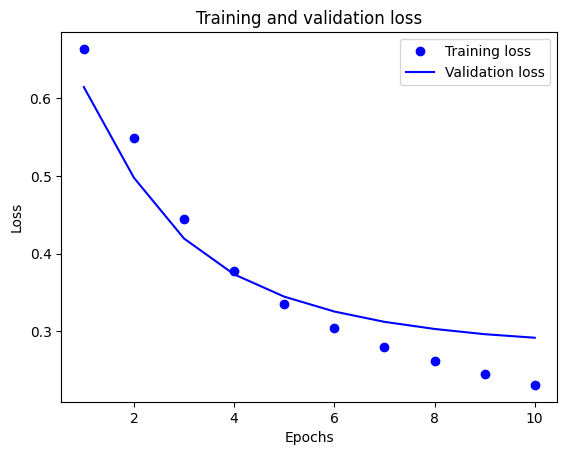

In [32]:
epochs = range(1, len(acc_dense) + 1)
plt.plot(epochs, loss_dense, 'bo', label='Training loss')
plt.plot(epochs, val_loss_dense, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting training and validation accuracy

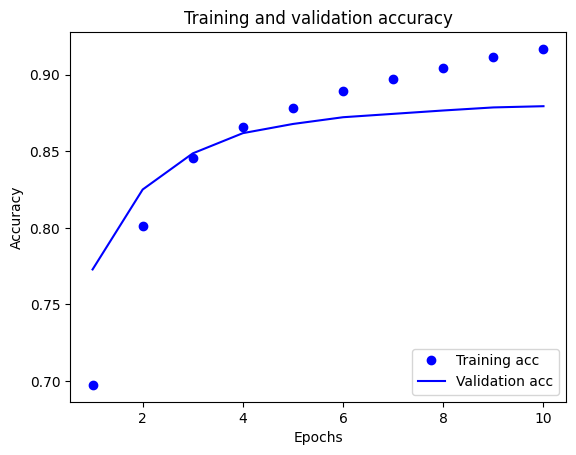

In [33]:
plt.plot(epochs, acc_dense, 'bo', label='Training acc')
plt.plot(epochs, val_acc_dense, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Model LSTM

In [34]:
n_lstm = 20
drop_lstm =0.2

**Line-by-line Explnation -**

1. `layers.Embedding(max_features + 1, embedding_dim)`: This layer represents an embedding layer. It converts integer-encoded words into dense vectors of fixed size (embedding_dim). max_features is the size of the vocabulary, and max_features + 1 is used because the IMDb dataset indexing starts at 1, not 0.

2. `layers.LSTM(n_lstm, dropout=drop_lstm, return_sequences=False)`: This is an LSTM layer with `n_lstm` LSTM units. It's set up to have dropout applied to the input data `(dropout=drop_lstm)` to prevent overfitting. return_sequences=False indicates that it returns only the final output of the sequence.

3. `layers.Dense(1)`: This is the output layer with a single neuron and a sigmoid activation function. It's used for binary classification (positive or negative sentiment).

In [35]:
model_lstm = tf.keras.Sequential(
    [
        layers.Embedding(max_features + 1, embedding_dim),
        layers.LSTM(n_lstm, dropout = drop_lstm, return_sequences=False),
        layers.Dense(1)
    ]
)
model_lstm

In [36]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160016    
                                                                 
 lstm (LSTM)                 (None, 20)                2960      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 162,997
Trainable params: 162,997
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras import losses
model_lstm.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [38]:
epochs = 10
history_lstm = model_lstm.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 48s 72ms/step - loss: 0.6921 - binary_accuracy: 0.5228 - val_loss: 0.6807 - val_binary_accuracy: 0.5440
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6505 - binary_accuracy: 0.6398 - val_loss: 0.6807 - val_binary_accuracy: 0.5374
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.6621 - binary_accuracy: 0.5867 - val_loss: 0.5911 - val_binary_accuracy: 0.7076
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6693 - binary_accuracy: 0.5922 - val_loss: 0.6919 - val_binary_accuracy: 0.5166
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6664 - binary_accuracy: 0.5796 - val_loss: 0.6816 - val_binary_accuracy: 0.5452
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.5785 - binary_accuracy: 0.7102 - val_loss: 0.5540 - val_binary_accuracy: 0.7468
Epoch 7/10
625/625 [==============================] - 7s 

In [39]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(test_ds)
print("Loss of Dense Model : ", loss_lstm)
print("Accuracy of Dense Model : ", accuracy_lstm)

782/782 [==============================] - 4s 5ms/step - loss: 0.5364 - binary_accuracy: 0.7679
Loss of Dense Model :  0.5363714694976807
Accuracy of Dense Model :  0.7678800225257874


In [40]:
import matplotlib.pyplot as plt
history_dict_lstm = history_lstm.history
history_dict_lstm.keys()
acc_lstm = history_dict_lstm['binary_accuracy']
val_acc_lstm = history_dict_lstm['val_binary_accuracy']
loss_lstm = history_dict_lstm['loss']
val_loss_lstm = history_dict_lstm['val_loss']

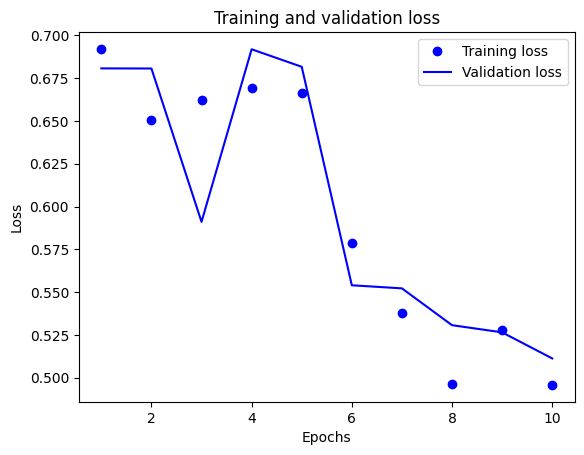

In [41]:
epochs = range(1, len(acc_lstm) + 1)
plt.plot(epochs, loss_lstm, 'bo', label='Training loss')
plt.plot(epochs, val_loss_lstm, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

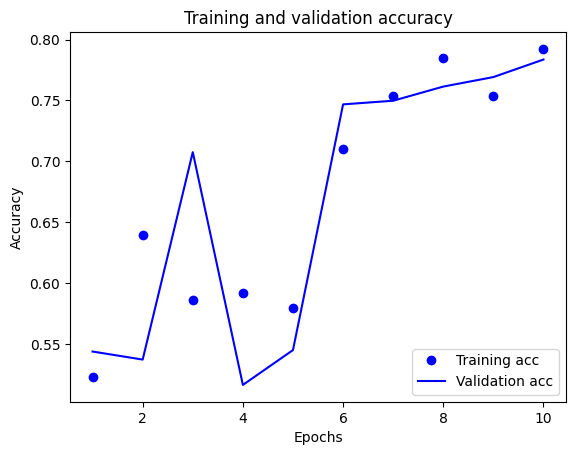

In [42]:
plt.plot(epochs, acc_lstm, 'bo', label='Training acc')
plt.plot(epochs, val_acc_lstm, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Model Bi-Directional LSTM

**Line-by-line Explanation -**

1. `layers.Embedding(max_features + 1, embedding_dim)`: This layer represents an embedding layer, which converts integer-encoded words into dense vectors of fixed size (embedding_dim).

2. `layers.Bidirectional(layers.LSTM(n_lstm, dropout=drop_lstm, return_sequences=False))`: This is the Bidirectional LSTM layer. It wraps an LSTM layer with n_lstm LSTM units and applies dropout to the input data to prevent overfitting. return_sequences=False indicates that it returns only the final output of the sequence. The bidirectional nature of this layer means it processes sequences both forwards and backwards, which can capture context from both directions.

3. `layers.Dense(1)`: This is the output layer with a single neuron and a sigmoid activation function, used for binary classification (positive or negative sentiment).

In [43]:
model_bilstm = tf.keras.Sequential(
    [
        layers.Embedding(max_features + 1, embedding_dim),
        layers.Bidirectional(layers.LSTM(n_lstm, dropout = drop_lstm, return_sequences=False)),
        layers.Dense(1)
    ]
)
model_bilstm

In [44]:
model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160016    
                                                                 
 bidirectional (Bidirectiona  (None, 40)               5920      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 165,977
Trainable params: 165,977
Non-trainable params: 0
_________________________________________________________________


In [45]:
from tensorflow.keras import losses
model_bilstm.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [46]:
epochs = 10
history_bilstm = model_bilstm.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 56s 83ms/step - loss: 0.4993 - binary_accuracy: 0.7535 - val_loss: 0.5039 - val_binary_accuracy: 0.8076
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2990 - binary_accuracy: 0.8862 - val_loss: 0.3523 - val_binary_accuracy: 0.8602
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2337 - binary_accuracy: 0.9154 - val_loss: 0.3481 - val_binary_accuracy: 0.8644
Epoch 4/10
625/625 [==============================] - 12s 18ms/step - loss: 0.2349 - binary_accuracy: 0.9147 - val_loss: 0.3991 - val_binary_accuracy: 0.8546
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1753 - binary_accuracy: 0.9397 - val_loss: 0.4478 - val_binary_accuracy: 0.8682
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1424 - binary_accuracy: 0.9542 - val_loss: 0.4822 - val_binary_accuracy: 0.8622
Epoch 7/10
625/625 [==============================] 

In [47]:
loss_bilstm, accuracy_bilstm = model_bilstm.evaluate(test_ds)
print("Loss of Dense Model : ", loss_bilstm)
print("Accuracy of Dense Model : ", accuracy_bilstm)

782/782 [==============================] - 6s 8ms/step - loss: 0.6218 - binary_accuracy: 0.8332
Loss of Dense Model :  0.6218331456184387
Accuracy of Dense Model :  0.8331599831581116


In [48]:
import matplotlib.pyplot as plt
history_dict_bilstm = history_bilstm.history
history_dict_bilstm.keys()
acc_bilstm = history_dict_bilstm['binary_accuracy']
val_acc_bilstm = history_dict_bilstm['val_binary_accuracy']
loss_bilstm = history_dict_bilstm['loss']
val_loss_bilstm = history_dict_bilstm['val_loss']

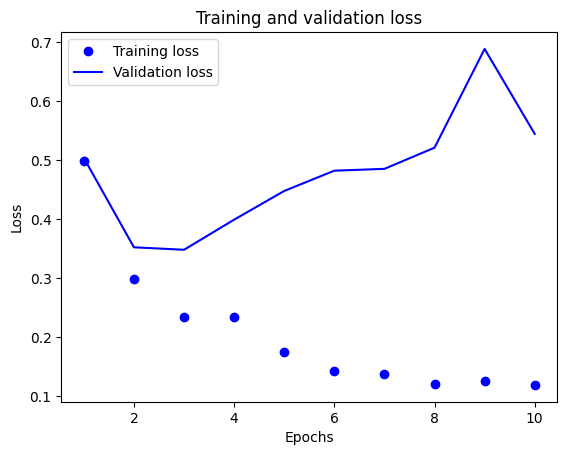

In [49]:
epochs = range(1, len(acc_bilstm) + 1)
plt.plot(epochs, loss_bilstm, 'bo', label='Training loss')
plt.plot(epochs, val_loss_bilstm, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

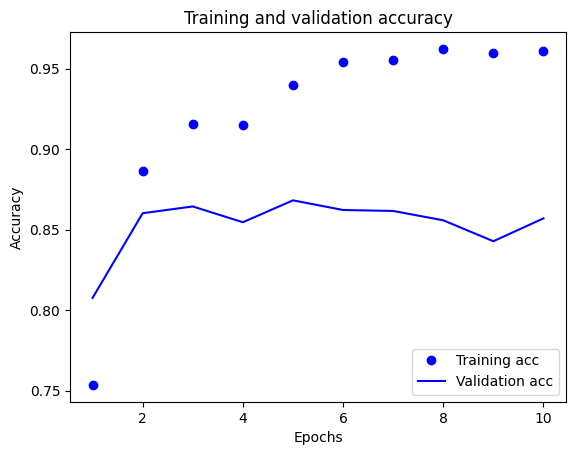

In [50]:
plt.plot(epochs, acc_bilstm, 'bo', label='Training acc')
plt.plot(epochs, val_acc_bilstm, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Model GRU

**Line-by-line Explanation -**

1. `layers.Embedding(max_features + 1, embedding_dim)`: This layer represents an embedding layer. It converts integer-encoded words into dense vectors of fixed size (embedding_dim). max_features is the size of the vocabulary, and max_features + 1 is used because the IMDb dataset indexing starts at 1, not 0.

2. `layers.GRU(n_lstm, dropout=drop_lstm, return_sequences=False)`: This is the GRU layer. It has n_lstm GRU units and applies dropout to the input data to prevent overfitting. return_sequences=False indicates that it returns only the final output of the sequence.

3. `layers.Dense(1)`: This is the output layer with a single neuron and a sigmoid activation function. It's used for binary classification (positive or negative sentiment).

In [51]:
model_gru = tf.keras.Sequential(
    [
        layers.Embedding(max_features + 1, embedding_dim),
        layers.GRU(n_lstm, dropout = drop_lstm, return_sequences=False),
        layers.Dense(1)
    ]
)
model_gru

In [52]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 gru (GRU)                   (None, 20)                2280      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 162,317
Trainable params: 162,317
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras import losses
model_gru.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [54]:
epochs = 10
history_gru = model_gru.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 49s 76ms/step - loss: 0.6930 - binary_accuracy: 0.5081 - val_loss: 0.6924 - val_binary_accuracy: 0.5110
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6759 - binary_accuracy: 0.5551 - val_loss: 0.6842 - val_binary_accuracy: 0.5322
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6325 - binary_accuracy: 0.6033 - val_loss: 0.6936 - val_binary_accuracy: 0.5122
Epoch 4/10
625/625 [==============================] - 7s 12ms/step - loss: 0.6192 - binary_accuracy: 0.6347 - val_loss: 0.6785 - val_binary_accuracy: 0.5880
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.4975 - binary_accuracy: 0.7809 - val_loss: 0.5271 - val_binary_accuracy: 0.7718
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.4701 - binary_accuracy: 0.8065 - val_loss: 0.6045 - val_binary_accuracy: 0.7318
Epoch 7/10
625/625 [==============================] - 7s 

In [55]:
loss_gru, accuracy_gru = model_gru.evaluate(test_ds)
print("Loss of Dense Model : ", loss_gru)
print("Accuracy of Dense Model : ", accuracy_gru)

782/782 [==============================] - 4s 5ms/step - loss: 0.5000 - binary_accuracy: 0.7730
Loss of Dense Model :  0.5000473260879517
Accuracy of Dense Model :  0.7730399966239929


In [56]:
import matplotlib.pyplot as plt
history_dict_gru = history_gru.history
history_dict_gru.keys()
acc_gru = history_dict_gru['binary_accuracy']
val_acc_gru = history_dict_gru['val_binary_accuracy']
loss_gru = history_dict_gru['loss']
val_loss_gru = history_dict_gru['val_loss']

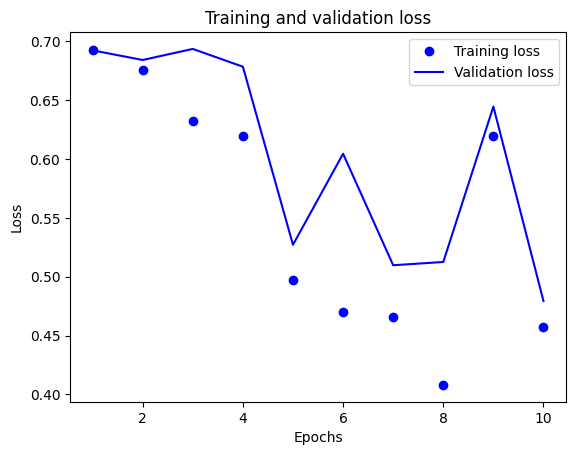

In [57]:
epochs = range(1, len(acc_gru) + 1)
plt.plot(epochs, loss_gru, 'bo', label='Training loss')
plt.plot(epochs, val_loss_gru, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

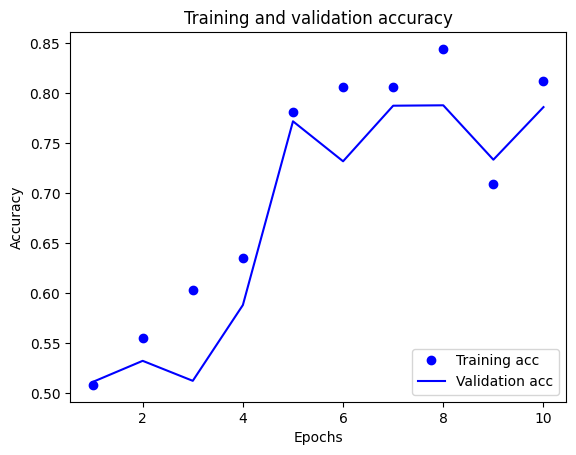

In [58]:
plt.plot(epochs, acc_gru, 'bo', label='Training acc')
plt.plot(epochs, val_acc_gru, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Combined Plot

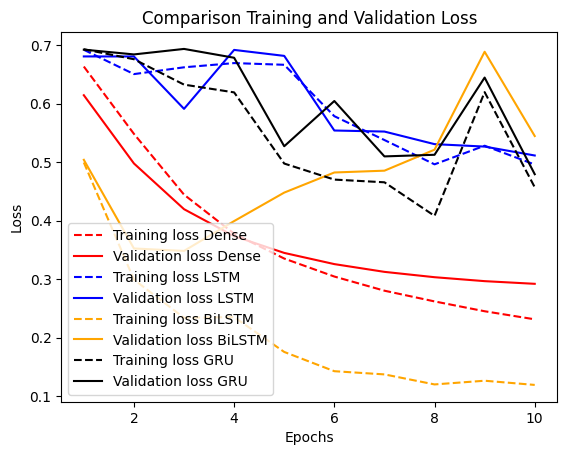

In [59]:
epochs = range(1, len(acc_dense) + 1)
plt.plot(figsize = (16,10))
plt.plot(epochs, loss_dense, '--', label='Training loss Dense',color = 'red')
plt.plot(epochs, val_loss_dense, label='Validation loss Dense',color = 'red')
plt.plot(epochs, loss_lstm, '--', label='Training loss LSTM',color = 'blue')
plt.plot(epochs, val_loss_lstm, label='Validation loss LSTM',color = 'blue')
plt.plot(epochs, loss_bilstm, '--', label='Training loss BiLSTM',color = 'orange')
plt.plot(epochs, val_loss_bilstm, label='Validation loss BiLSTM',color = 'orange')
plt.plot(epochs, loss_gru, '--', label='Training loss GRU',color = 'black')
plt.plot(epochs, val_loss_gru, label='Validation loss GRU',color = 'black')
plt.title('Comparison Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

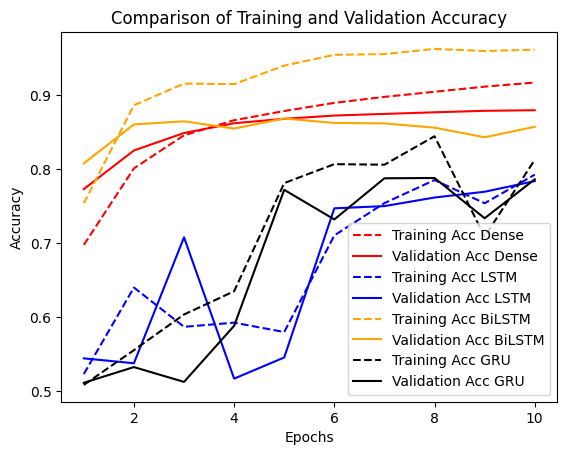

In [60]:
epochs = range(1, len(acc_dense) + 1)
plt.plot(figsize = (16,10))
plt.plot(epochs, acc_dense, '--', label='Training Acc Dense',color = 'red')
plt.plot(epochs, val_acc_dense, label='Validation Acc Dense',color = 'red')
plt.plot(epochs, acc_lstm, '--', label='Training Acc LSTM',color = 'blue')
plt.plot(epochs, val_acc_lstm, label='Validation Acc LSTM',color = 'blue')
plt.plot(epochs, acc_bilstm, '--', label='Training Acc BiLSTM',color = 'orange')
plt.plot(epochs, val_acc_bilstm, label='Validation Acc BiLSTM',color = 'orange')
plt.plot(epochs, acc_gru, '--', label='Training Acc GRU',color = 'black')
plt.plot(epochs, val_acc_gru, label='Validation Acc GRU',color = 'black')
plt.title('Comparison of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Optimized Code

In [61]:
units = 50
set_dropout =0.2
epochs = 10
embedding_dim = 16
batch_size = 32

def model_builder(model_type, name):
    model = tf.keras.Sequential()

    model.add(layers.Embedding(max_features + 1, embedding_dim))

    if model_type == 'LSTM':
        model.add(layers.LSTM(units = units, dropout = set_dropout, return_sequences=False))
    elif model_type == 'Bidirectional LSTM':
        model.add(layers.Bidirectional(layers.LSTM(units = units, dropout = set_dropout, return_sequences=False)))
    elif model_type == 'GRU':
        model.add(layers.GRU(units=units, dropout = set_dropout, return_sequences=False))

    model.add(layers.Dense(1))

    model.compile(loss=losses.BinaryCrossentropy(from_logits=True),optimizer='adam',metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

    history = model.fit(train_ds, epochs=epochs, batch_size=batch_size, validation_data=val_ds)

    loss, accuracy = model.evaluate(test_ds)

    return history, name, loss, accuracy

In [62]:
histories = []

lstm_history, lstm_name , lstm_loss, lstm_accuracy = model_builder('LSTM', 'LSTM')
histories.append((lstm_history, lstm_name))

print("==============================================================================================================")
print("==============================================================================================================")

bidirectional_lstm_history, bidirectional_lstm_name , bidirectional_lstm_loss, bidirectional_lstm_accuracy = model_builder('Bidirectional LSTM', 'Bidirectional LSTM')
histories.append((bidirectional_lstm_history, bidirectional_lstm_name))

print("==============================================================================================================")
print("==============================================================================================================")

gru_history, gru_name, gru_loss, gru_accuracy = model_builder('GRU', 'GRU')
histories.append((gru_history, gru_name))

Epoch 1/10
625/625 [==============================] - 50s 77ms/step - loss: 0.6910 - binary_accuracy: 0.5209 - val_loss: 0.6975 - val_binary_accuracy: 0.5120
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6753 - binary_accuracy: 0.5651 - val_loss: 0.6763 - val_binary_accuracy: 0.5882
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6602 - binary_accuracy: 0.5958 - val_loss: 0.6561 - val_binary_accuracy: 0.5770
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.6504 - binary_accuracy: 0.5956 - val_loss: 0.6549 - val_binary_accuracy: 0.5650
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6146 - binary_accuracy: 0.6470 - val_loss: 0.6522 - val_binary_accuracy: 0.6404
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.5682 - binary_accuracy: 0.7061 - val_loss: 0.5231 - val_binary_accuracy: 0.7810
Epoch 7/10
625/625 [==============================] - 8s 

In [63]:
print("Loss of LSTM Model : ", lstm_loss)
print("Accuracy of LSTM Model : ", lstm_accuracy)
print("==========================================")
print("Loss of Bi-LSTM Model : ", bidirectional_lstm_loss)
print("Accuracy of Bi-LSTM Model : ", bidirectional_lstm_accuracy)
print("==========================================")
print("Loss of GRU Model : ", gru_loss)
print("Accuracy of GRU Model : ", gru_accuracy)

Loss of LSTM Model :  0.39977502822875977
Accuracy of LSTM Model :  0.8375200033187866
Loss of Bi-LSTM Model :  2.1280269622802734
Accuracy of Bi-LSTM Model :  0.5256800055503845
Loss of GRU Model :  0.4831615686416626
Accuracy of GRU Model :  0.8354799747467041


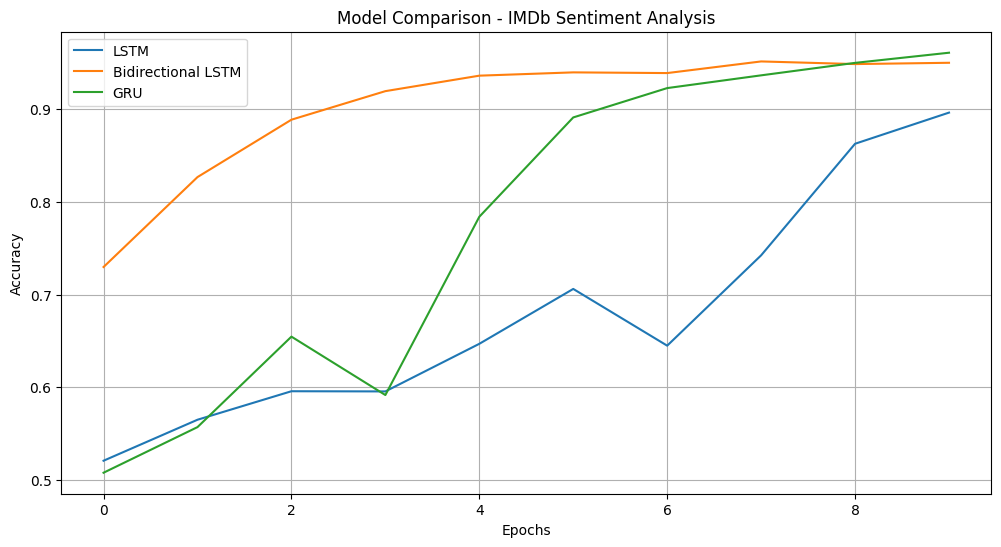

In [64]:
plt.figure(figsize=(12, 6))
for history, name in histories:
    epochs = range(1, len(acc_dense) + 1)
    plt.plot(figsize = (16,10))
    plt.plot(history.history['binary_accuracy'], label=name)

plt.title('Model Comparison - IMDb Sentiment Analysis')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

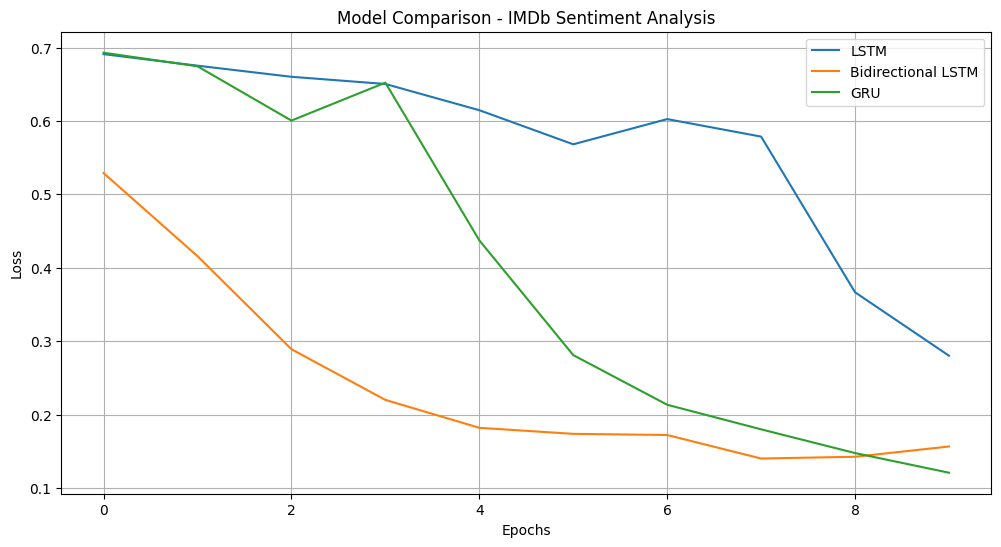

In [65]:
plt.figure(figsize=(12, 6))
for history, name in histories:
    epochs = range(1, len(acc_dense) + 1)
    plt.plot(figsize = (16,10))
    plt.plot(history.history['loss'], label=name)

plt.title('Model Comparison - IMDb Sentiment Analysis')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Export the model

If we want to make our model capable of processing raw strings, we can include the `TextVectorization` layer inside our model. For that we will create a new model using the weights we just trained.

This `exported_model` can be used to make predictions or export for deployment, particularly if you want to use the model for inference on new, unseen data. It takes raw text data as input, preprocesses it using the `vectorize_layer`, passes it through the existing model and applies the sigmoid activation to produce probabilities.

In [ ]:
exported_model = tf.keras.Sequential([
  vectorization_layer,
  model
  layers.Activation('sigmoid')
])
exported_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

### Test it with `raw_test_ds`, which yields raw strings

In [ ]:
loss, accuracy = exported_model.evaluate(raw_test_ds)
print("Accuracy of our Model =",accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3101 - accuracy: 0.8732
Accuracy of our Model = 0.8732399940490723
